In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict
import calendar
from datetime import datetime

In [2]:
#Read in the data
data = pd.read_csv("Lekagul Sensor Data.csv")
data

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7


In [3]:
#Check each column's data type
data.dtypes

Timestamp    object
car-id       object
car-type     object
gate-name    object
dtype: object

In [4]:
#Check for nulls
data.isna().sum()

Timestamp    0
car-id       0
car-type     0
gate-name    0
dtype: int64

In [5]:
#Change variables to appropriate type
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['car-type'] = data['car-type'].astype('category')
data['gate-name'] = data['gate-name'].astype('category')

data

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7


In [6]:
#Check each column's data type again
data.dtypes

Timestamp    datetime64[ns]
car-id               object
car-type           category
gate-name          category
dtype: object

In [7]:
#Describe the statistics of the base data
data.describe()

/var/folders/cr/vfq_sd4d21n4gk63s5b8v_dh0000gn/T/ipykernel_76478/2462266413.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,Timestamp,car-id,car-type,gate-name
count,171477,171477,171477,171477
unique,170298,18708,7,40
top,2015-07-31 12:00:02,20154519024544-322,1,general-gate7
freq,5,281,67698,16119
first,2015-05-01 00:43:28,NaN,NaN,NaN
last,2016-05-31 23:56:06,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'Timestamp'}>]], dtype=object)

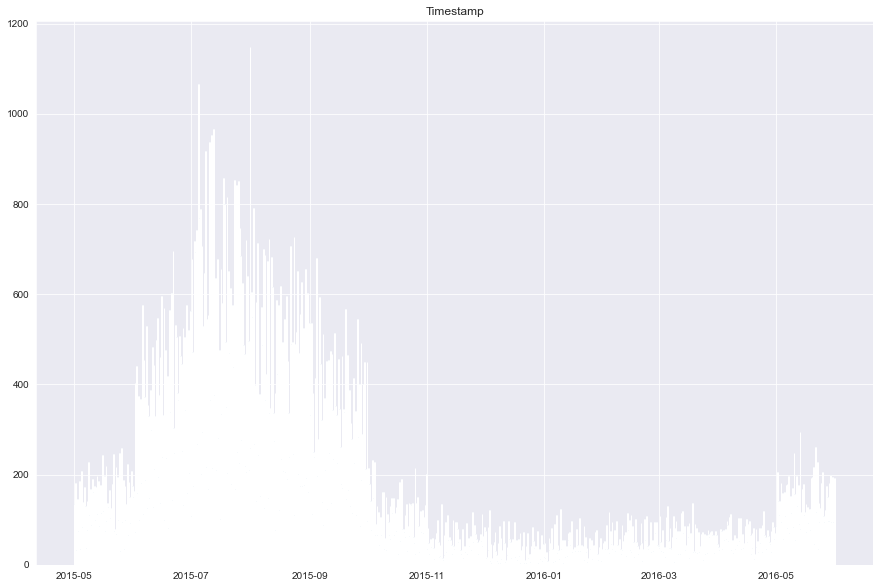

In [8]:
#Visualize distribution of each column & outliers
data.hist(bins=1000, figsize=(15, 10))

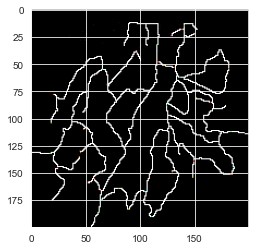

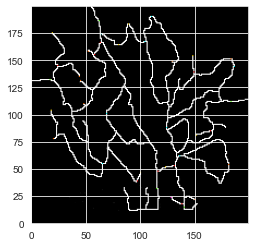

(<matplotlib.image.AxesImage at 0x12eef3c10>, None, None)

In [9]:
#load in bmp
img = cv2.imread('Lekagul Roadways.bmp')
flip = img[::-1,:,:]
pixel_values = flip[:,:,::-1]
plt.imshow(flip[:,:,::-1],vmin=0,vmax=255), plt.show()
plt.imshow(flip[:,:,::-1]), plt.gca().invert_yaxis(), plt.show()

In [10]:
#color names

# (0, 0, 0), black
#  (0, 255, 255), cyan
#  (1, 1, 1), black
#  (2, 2, 2), black
#  (3, 3, 3), black
#  (5, 5, 5), black
#  (6, 6, 6), black
#  (8, 8, 8), black
#  (9, 9, 9), black
#  (14, 14, 14), black
#  (16, 16, 16),black
#  (17, 17, 17),black
#  (18, 18, 18),black
#  (19, 19, 19),black
#  (20, 20, 20),black
#  (21, 21, 21),black
#  (22, 22, 22),black
#  (23, 23, 23),black
#  (24, 24, 24),black
#  (25, 25, 25),black
#  (31, 31, 31),black
#  (46, 46, 46),black
#  (64, 64, 64),black
#  (65, 65, 65),black
#  (66, 66, 66),black
#  (67, 67, 67),black
#  (68, 68, 68),black
#  (70, 70, 70),black
#  (72, 72, 72),black
#  (76, 255, 0),green
#  (239, 239, 239),yellow
#  (255, 0, 0),red
#  (255, 0, 220),pink
#  (255, 106, 0),orange
#  (255, 216, 0),orange
#  (255, 255, 255)white

In [11]:
#create np.array grid
# replace color values with sensor names
# 'R' signifies a road
# '.' signifies empty space
grid = [['.' for i in range(200)] for j in range(200)]

for y in range(len(pixel_values)):
    for x in range(len(pixel_values[y])):
        if (pixel_values[x][y] == [0, 255, 255]).all():
            grid[x][y] = 'general-gate'
        elif (pixel_values[x][y] == [76, 255, 0]).all():
            grid[x][y] = 'entrance'
        elif (pixel_values[x][y] == [255, 216, 0]).all():
            grid[x][y] = 'ranger-stop'
        elif (pixel_values[x][y] == [255, 0, 0]).all():
            grid[x][y] = 'gate'
        elif (pixel_values[x][y] == [255, 0, 220]).all():
            grid[x][y] = 'ranger-base'
        elif (pixel_values[x][y] == [255, 106, 0]).all():
            grid[x][y] = 'camping'
        elif (pixel_values[x][y] == [255, 255, 255]).all():
            grid[x][y] = 'R'
        else:
            continue

In [12]:
#get just the coordinates of the sensors

color_map = []
for x in range(len(grid)):
    for y in range(len(grid[x])):
        if grid[x][y] == ".":
            continue
        else:
            color_map.append([grid[x][y], (y,x)])


In [13]:
#Recursive function to find the shortest path along the roads

def find_dist(start, end, count, checked = None ):
    if checked is None:
	    checked = []
    checked.append(start)

    if start == end:
        return count

    else:
        if (['R', (start[0] + 1, start[1])] in color_map and (start[0] + 1, start[1]) not in checked) or (end == (start[0] + 1, start[1])):
            count += 1
            res = find_dist((start[0] + 1, start[1]), end, count, checked)
            if res is not None:
                return res
        if (['R', (start[0], start[1] + 1)] in color_map and (start[0], start[1] + 1) not in checked) or (end == (start[0], start[1] + 1)):
            count += 1
            res = find_dist((start[0], start[1] + 1), end, count, checked)
            if res is not None:
                return res
        if (['R', (start[0] - 1, start[1])] in color_map and (start[0] - 1, start[1]) not in checked) or (end == (start[0] - 1, start[1])):
            count += 1
            res = find_dist((start[0] - 1, start[1]), end, count, checked)
            if res is not None:
                return res
        if (['R', (start[0], start[1] - 1)] in color_map and (start[0], start[1] - 1) not in checked) or (end == (start[0], start[1] - 1)):
            count += 1
            res = find_dist((start[0], start[1] - 1), end, count, checked)
            if res is not None:
                return res

In [14]:
#create graph of all sensors

g = {"entrance0": {'general-gate1', 'gate0', 'general-gate4', 'general-gate7', 'gate7', 'gate6', 'entrance3'},
     "entrance1": {'gate2', 'camping2', 'camping3', 'camping4', 'camping0', 'gate1', 'general-gate7'},
     "entrance2": {'general-gate3', 'gate3', 'camping8', 'camping1', 'general-gate0', 'general-gate2', 'general-gate5', 'gate4', 'general-gate6', 'gate5', 'camping6', 'gate8', 'entrance4'},
     "entrance3": {'gate6', 'gate7', 'general-gate7', 'general-gate4', 'gate0', 'general-gate1', 'entrance0'},
     "entrance4": {'gate8', 'camping6', 'gate5', 'general-gate6', 'gate4', 'entrance2', 'general-gate3', 'general-gate5', 'gate3', 'camping8', 'camping1', 'general-gate0', 'general-gate2'},
     "gate0": {'gate1', 'entrance0', 'general-gate1', 'general-gate4', 'gate6', 'entrance3', 'general-gate7', 'gate7'},
     "gate1": {'camping0', 'gate0', 'camping3', 'camping4', 'entrance1', 'gate2', 'camping2', 'general-gate7'},
     "gate2": {'ranger-stop1', 'camping2', 'entrance1', 'camping4', 'camping3', 'camping0', 'gate1', 'general-gate7'},
     "gate3": {'ranger-stop3', 'camping8', 'camping1', 'general-gate0', 'general-gate2', 'general-gate5', 'general-gate3', 'entrance2', 'gate4', 'general-gate6', 'gate5', 'camping6', 'gate8', 'entrance4'},
     "gate4": {'ranger-stop5', 'entrance2', 'general-gate3', 'general-gate5', 'gate3', 'camping8', 'camping1', 'general-gate0', 'general-gate2', 'general-gate6', 'gate5', 'camping6', 'gate8', 'entrance4'},
     "gate5": {'ranger-stop6', 'camping6', 'gate8', 'entrance4', 'general-gate6', 'general-gate5', 'gate4', 'entrance2', 'general-gate3', 'camping8', 'gate3', 'camping1', 'general-gate0', 'general-gate0'},
     "gate6": {'ranger-stop6', 'entrance3', 'entrance0', 'general-gate1', 'gate0', 'general-gate4', 'general-gate7', 'gate7'},
     "gate7": {'ranger-stop7', 'general-gate7', 'general-gate4', 'gate6', 'entrance3', 'gate0', 'general-gate1', 'entrance0'},
     "gate8": {'ranger-base', 'entrance4', 'camping6', 'gate5', 'general-gate6', 'general-gate5', 'gate4', 'entrance2', 'general-gate3', 'camping8', 'gate3', 'camping1', 'general-gate0', 'general-gate2'},
     "camping0": {'gate1', 'camping3', 'camping4', 'entrance1', 'gate2', 'camping2', 'general-gate7'},
     "camping1": {'general-gate0', 'general-gate2', 'general-gate5', 'gate3', 'camping8', 'general-gate3', 'entrance2', 'gate4', 'general-gate6', 'gate5', 'camping6', 'gate8', 'entrance4'},
     "camping2": {'gate2', 'entrance1', 'camping4', 'camping3', 'camping0', 'gate1', 'general-gate7'},
     "camping3": {'gate1', 'camping0', 'camping4', 'entrance1', 'gate2', 'camping2', 'general-gate7'},
     "camping4": {'general-gate7', 'gate1', 'camping0', 'camping3', 'entrance1', 'gate2', 'camping2'},
     "camping5": {'ranger-stop4', 'general-gate7'},
     "camping6": {'entrance4', 'gate8', 'gate5', 'general-gate6', 'general-gate5', 'gate4', 'entrance2', 'general-gate3', 'gate3', 'camping8', 'camping1', 'general-gate0', 'general-gate2'},
     "camping7": {'general-gate6'},
     "camping8": {'general-gate3', 'gate3', 'camping1', 'general-gate0', 'general-gate2', 'general-gate5', 'entrance2', 'gate4', 'general-gate6', 'gate5', 'camping6', 'gate8', 'entrance4'},
     "general-gate0": {'general-gate2', 'camping1', 'gate3', 'camping8', 'general-gate5', 'general-gate3', 'entrance2', 'gate4', 'general-gate6', 'gate5', 'camping6', 'gate8', 'entrance4'},
     "general-gate1": {'entrance0', 'gate0', 'ranger-stop2', 'general-gate4', 'gate6', 'entrance3', 'general-gate7', 'gate7'},
     "general-gate2": {'ranger-stop0', 'general-gate0', 'camping1', 'general-gate5', 'gate3', 'camping8', 'general-gate3', 'entrance2', 'gate4', 'general-gate6', 'gate5', 'camping6', 'gate8', 'entrance4'},
     "general-gate3": {'camping8', 'entrance2', 'gate4', 'general-gate6', 'gate5', 'camping6', 'gate8', 'entrance4', 'general-gate5', 'gate3', 'camping1', 'general-gate0', 'general-gate2'},
     "general-gate4": {'entrance0', 'general-gate1', 'gate0', 'gate6', 'entrance3', 'gate7', 'general-gate7'},
     "general-gate5": {'gate5', 'camping6', 'gate8', 'entrance4', 'general-gate6', 'gate4', 'entrance2', 'general-gate3', 'camping8', 'gate3', 'camping1', 'general-gate0', 'general-gate2'},
     "general-gate6": {'camping7', 'gate5', 'camping6', 'gate8', 'entrance4', 'general-gate5', 'gate4', 'entrance2', 'general-gate3', 'camping8', 'gate3', 'camping1', 'general-gate0', 'general-gate2'},
     "general-gate7": {'camping5', 'ranger-stop4', 'gate7', 'general-gate4', 'gate6', 'entrance3', 'entrance1', 'gate2', 'camping2', 'camping4', 'camping3', 'camping0', 'gate1', 'gate0', 'general-gate1', 'entrance0'},
     "ranger-stop0": {'ranger-stop2', 'general-gate2'},
     "ranger-stop1": {'gate2'},
     "ranger-stop2": {'ranger-stop0', 'general-gate1'},
     "ranger-stop3": {'gate3'},
     "ranger-stop4": {'camping5', 'general-gate7'},
     "ranger-stop5": {'gate4'},
     "ranger-stop6": {'gate5', 'gate6'},
     "ranger-stop7": {'gate7'},
     "ranger-base": {'gate8'},
     }

In [15]:
#Mapped all sensors to their coordinates

sensor_coords = [('entrance0', (62, 186)),
                 ('entrance1', (17, 132)),
                 ('entrance2', (183, 112)),
                 ('entrance3', (115, 32)),
                 ('entrance4', (140, 15)),
                 ('gate0', (63, 166)),
                 ('gate1', (58, 155)),
                 ('gate2', (24, 145)),
                 ('gate3', (149, 139)),
                 ('gate4', (164, 85)),
                 ('gate5', (131, 53)),
                 ('gate6', (116, 48)),
                 ('gate7', (97, 39)),
                 ('gate8', (138, 18)),
                 ('camping0', (52, 158)),
                 ('camping1', (129, 149)),
                 ('camping2', (45, 131)),
                 ('camping3', (44, 135)),
                 ('camping4', (48, 110)),
                 ('camping5', (20, 78)),
                 ('camping6', (150, 22)),
                 ('camping7', (181, 54)),
                 ('camping8', (183, 151)),
                 ('ranger-base', (128, 24)),
                 ('ranger-stop0', (89, 183)),
                 ('ranger-stop1', (19, 175)),
                 ('ranger-stop2', (80, 164)),
                 ('ranger-stop3', (148, 154)),
                 ('ranger-stop4', (18, 104)),
                 ('ranger-stop5', (151, 81)),
                 ('ranger-stop6', (123, 52)),
                 ('ranger-stop7', (100, 47)),
                 ('general-gate0', (110, 190)),
                 ('general-gate1', (64, 174)),
                 ('general-gate2', (104, 167)),
                 ('general-gate3', (186, 144)),
                 ('general-gate4', (69, 101)),
                 ('general-gate5', (124, 88)),
                 ('general-gate6', (136, 62)),
                 ('general-gate7', (65, 55))
                 ]

In [16]:
#create tuples for each connected pair of sensors
#omit duplicates, regardless of direction

pairs = []
for key, values in g.items():
    for v in values:
        pairs.append((key, v))
pairs = {*map(tuple, map(sorted, pairs))}


In [17]:
#Find all distances between pairs
dists = []
for x in pairs:
    start_coord = sensor_coords[[t[0] for t in sensor_coords].index(x[0])]
    end_coord = sensor_coords[[t[0] for t in sensor_coords].index(x[1])]
    dists.append([start_coord[0], end_coord[0], find_dist(start_coord[1], end_coord[1], 0)])

In [18]:
#convert distances to miles
#one pixel (ie one distance) is 0.06 miles

for x in dists:
    x[2] = round(x[2]*0.06, 2)
    print(x)
#print(dists)

['general-gate0', 'general-gate2', 12.3]
['gate6', 'general-gate7', 8.04]
['general-gate1', 'general-gate4', 13.86]
['camping8', 'gate5', 24.18]
['entrance3', 'general-gate7', 8.94]
['gate6', 'general-gate4', 9.6]
['general-gate4', 'general-gate7', 12.9]
['camping6', 'general-gate0', 24.42]
['gate5', 'general-gate5', 13.74]
['camping0', 'general-gate7', 11.28]
['entrance1', 'general-gate7', 8.04]
['entrance4', 'general-gate6', 3.72]
['general-gate3', 'general-gate5', 7.32]
['camping6', 'entrance4', 1.5]
['camping2', 'camping3', 9.78]
['gate8', 'general-gate6', 3.66]
['camping3', 'camping4', 7.38]
['camping2', 'gate1', 4.62]
['camping6', 'gate4', 7.74]
['gate6', 'general-gate1', 11.46]
['camping6', 'general-gate5', 16.86]
['gate4', 'general-gate0', 16.98]
['gate8', 'general-gate0', 24.12]
['camping4', 'gate1', 5.1]
['camping3', 'gate1', 12.06]
['gate3', 'general-gate6', 20.76]
['general-gate3', 'general-gate6', 14.22]
['camping3', 'entrance1', 3.48]
['gate5', 'general-gate0', 21.3]
['ga

In [19]:
#dictionary with car id and car type as key
car_id_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    car_id_dict[(data['car-id'][x], data['car-type'][x])].append((data['Timestamp'][x], data['gate-name'][x]))

In [20]:
#sort car id dictionary by timestamp
#this will show the 'path' of each car over time
car_sorted = {x:sorted(car_id_dict[x]) for x in car_id_dict.keys()}

In [21]:
#get times between gates for each car
car_times_bt_gates = defaultdict(list)
for x in car_sorted.items():
    for y in dists:
        gate_times1 = [k for k, v in x[1] if v == y[0]]
        gate_times2 = [k for k, v in x[1] if v == y[1]]
        if gate_times1 and gate_times2:
            car_times_bt_gates[x[0]].append([gate_times1, gate_times2, tuple(y)])
        else:
            continue


In [22]:
#separate times by which pair of gates is being passed
time_by_gate = defaultdict(list)
for x in car_times_bt_gates.items():
    for y in x[1]:
        time_by_gate[(y[2], x[0][1])].append([y[0], y[1]])

In [23]:
#for cases where cars passed through the same gates multiple times,
#find the gates with the closest difference in time
#to ensure the gates were visited back to back

closest_times = defaultdict(list)
for x in time_by_gate.items():
    for y in x[1]:
        closest = datetime.now() - datetime(2015, 1, 1, 1, 1, 1, 1)
        diff = []
        for z in y[0]:
            temp = min(y[1], key=lambda t: abs(z-t))
            diff.append(abs(z - temp))
        closest_times[x[0]].append(min(diff))

In [98]:
#calculate speeds
speeds = defaultdict(list)
for x in closest_times.items():
    for y in x[1]:
        speeds[x[0]].append(x[0][0][2]/(y.total_seconds()/3600))

#assign values for plotting
x_vals = []
y_vals = []
hues = []
for x in speeds.items():
    hues.append(x[0][0])
    y_vals.append(sum(x[1])/len(x[1]))
    x_vals.append(x[0][1])


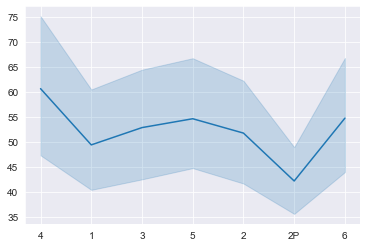

In [99]:

sns.lineplot(x=x_vals, y=y_vals)
plt.show()

In [26]:
#dictionary with timestamp as key
time_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    time_dict[data['Timestamp'][x]].append((data['car-id'][x], data['gate-name'][x], data['car-type'][x]))


In [27]:
#dictionary with vehicle type as key
car_type_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    car_type_dict[data['car-type'][x]].append((data['Timestamp'][x], data['gate-name'][x], data['car-id'][x]))

KeyboardInterrupt: 

In [ ]:
#dictionary with sensor name as key
gate_dict = defaultdict(list)
for x in range(len(data['car-id'])):
    gate_dict[data['gate-name'][x]].append((data['car-id'][x], data['Timestamp'][x], data['car-type'][x]))



In [ ]:
# track individual cars
print("Number of individual cars:",len(data['car-id'].unique()))

In [ ]:
# separate out by months and weekdays to see trends
data['month'] = [d.strftime('%b') for d in data.Timestamp]
data['day'] = [calendar.day_name[int(d.weekday())] for d in data.Timestamp]
data['days'] = [d.weekday() for d in data.Timestamp]
data['hours'] = [d.hour for d in data.Timestamp]
data['months'] = [d.month for d in data.Timestamp]
data.head()
data.head()

In [ ]:
# visualize data overall
sns.countplot(x=data.month, hue=data['car-type'])

In [ ]:
# a heatmap attempt 
sns.heatmap(data.groupby(['month', 'days', 'car-type']).size()[:, np.newaxis])

In [ ]:
# another heatmap attempt
times = np.asarray(data.days).reshape(171477,1)
sns.heatmap(times)

In [ ]:
# this attempt did not work to separate out cars by type
graph = data.set_index('day')
print(graph.head())
graph.groupby('day').count()['car-type'].plot(legend=True)

In [ ]:
g = data.groupby('month')['car-type'].value_counts()
g.head()
g.plot(legend=True)

In [ ]:
p = data.groupby(['month', 'car-type']).size()
p.head()

In [ ]:
p.unstack().plot(legend=True)

In [ ]:
l = data.groupby(['days','car-type']).size()
l.unstack().plot(legend=True)

In [ ]:
m = data.groupby(['month','days','car-type']).size()
m.unstack().plot(legend=True)

In [ ]:
m = data.groupby(['gate-name','car-type']).size()
m.unstack().plot(legend=True)

In [ ]:
n = data.groupby(['hours', 'car-type']).size()
n.unstack().plot(legend=True)

In [ ]:
# another heatmap attempt. not having luck with not having duplicate indexes...???
data["months2"] = pd.Categorical(data["month"], data.month.unique())
data["days2"] = pd.Categorical(data["days"], data.days.unique())
data["cars2"] = pd.Categorical(data["car-type"], data["car-type"].unique())
car_matrix = data.pivot("months2","days","car-type")
r = sns.heatmap (car_matrix, cmap='BuPu')

In [ ]:
sns.heatmap(data.groupby(['month', 'days', 'car-type']).size()[:, np.newaxis])

In [ ]:
times = np.asarray(data.days).reshape(171477,1)
sns.heatmap(times)

In [ ]:
sns.lineplot(x=data.day, y=data.groupby('car-type').count(),hue=data['car-type'])

In [ ]:
graph = data.set_index('day')
print(graph.head())
graph.groupby('day').count()['car-type'].plot(legend=True)

In [ ]:
g = data.groupby('month')['car-type'].value_counts()
g.head()

In [ ]:
g.plot(legend=True)

In [ ]:
p = data.groupby(['month', 'car-type']).size()
p.head()

In [ ]:
p.unstack().plot(legend=True)

In [ ]:
l = data.groupby(['days','car-type']).size()
l.unstack().plot(legend=True)

In [ ]:
m = data.groupby(['month','days','car-type']).size()
m.unstack().plot(legend=True)

In [ ]:
m = data.groupby(['gate-name','car-type']).size()
m.unstack().plot(legend=True)

In [ ]:
#Unneeded code for now.
#Keeping just in case.


#create graph class

# class Graph(object):
#
#     def __init__(self, graph_dict=None):
#         if graph_dict == None:
#             graph_dict = {}
#         self._graph_dict = graph_dict
#     def edges(self, vertex):
#         return self._graph_dict[vertex]
#     def all_vertices(self):
#         return set(self._graph_dict.keys())
#     def all_edges(self):
#         return self._generate_edges()
#     def add_vertex(self, vertex):
#         if vertex not in self._graph_dict:
#             self._graph_dict[vertex] = []
#     def add_edge(self, edge):
#         edge = set(edge)
#         v1, v2 = tuple(edge)
#         for x, y in [(v1, v2), (v2, v1)]:
#             for x in self._graph_dict:
#                 self._graph_dict[x].add(y)
#             else:
#                 self._graph_dict[x] = [y]
#     def _generate_edges(self):
#         edges = []
#         for vertex in self._graph_dict:
#             for neighbor in self._graph_dict[vertex]:
#                 if {neighbor, vertex} not in edges:
#                     edges.append({vertex, neighbor})
#         return edges
#     def __iter__(self):
#         self._iter_obj = iter(self._graph_dict)
#         return self._iter_obj
#     def __next__(self):
#         return next(self._iter_obj)
#     def __str__(self):
#         res = "vertices: "
#         for k in self._graph_dict:
#             res += str(k) + " "
#         res += "\nedges: "
#         for edge in self._generate_edges():
#             res += str(edge) + " "
#         return res
#
#
# g = Graph(g)